
# Project: No-Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In this project we will be analyzing the **Medical Appointment No-Show dataset** to address the problem of reserving a medical appointment and the patient did not show up. 
We will use the collected features about each appointment to extract insights and common trends between patients who be on time and those who never show up !

**Addressed questions in this analysis:**

<li> Is there a correlation between age and patients who did not show?
<li> Is there a correlation between number of days between the Scheduled Day and the Appointment Day with patients who did not show?
<li> Is there a correlation between sending SMS to the patient and the chance of showing up?
<li> Is there inter-relations among Hibertension, Handcap, Alcoholism, and Scholarship that describes patients who are more likely to not show up?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Step One: Loading and Exploring the Dataset

In [2]:
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.shape

(110527, 14)

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Dataset Summary**

<li> The dataset consists of 14 columns and 110527 rows.
<li> All 14 columns have no missing values.
<li> Handcap column has unlogic values represented in (column max is 4 while the column is 0 or 1 boolean column)
<li> Age column has unlogic values represented in (min is -1) 
<li> (PatientId, AppointmentID) columns have nothing to tell in predictiong whether or not a patient will show up.
<li> (SchedueledDay, AppointmentDay, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, sms_received, No-show) columns do not have the most appropriate datatypes.
    

**Columns Describtion**

<li> PatientId: Identification of a patient.
<li> AppointmentId: Identification of each appointment.
<li> Gender: Male or female.
<li> ScheduledDay: The day someone called or registered the appointment.
<li> AppointmentDay: The day of the actuall appointment.
<li> Age: How old is the patient.
<li> Neighbourhood: Indicates the location of the hospital.
<li> Scholarship: whether or not the patient isenrolled in Brasilian welfare program.
<li> Hipertension: True or False.
<li> Diabetes: True or False.
<li> Alcoholism: True or False.
<li> Handcap: True or False.
<li> SMS_received: 1 or more messages sent to the patient.
<li> No-show: True or False (be aware: True means did not show up).

### Step Two: Data Cleaning 

**Take a copy of the dataset before editing**

In [7]:
df_copy = df.copy()

**Removing Unwanted Columns**

In [8]:
df_copy.drop(['PatientId', 'AppointmentID'], axis= 1, inplace= True)

#Neighbourhood feature will not be included in the analysis
df_copy.drop(['Neighbourhood'], axis= 1, inplace= True)

**Remove wrong values from Handcap column**

In [9]:
df_copy[df_copy['Handcap'] > 1].shape

(199, 11)

There are 199 rows with wrong value for Handcap column, since the dataset consists of 110 K data pints removing them will not be a signficant issuee.

In [10]:
df_copy= df_copy[df_copy['Handcap'] <= 1]

**Remove wrong values from Handcap column**

In [11]:
df_copy[df_copy['Age'] < 0].shape

(1, 11)

There are 11 rows with wrong value for Age column, since the dataset consists of 110 K data pints removing them will not be a signficant issuee.

In [12]:
df_copy= df_copy[df_copy['Age'] >= 0]

**Adjusting Data Types**

1- ShedueledDay and AppointmentDay from string to datetime

In [13]:
df_copy['ScheduledDay'] = pd.to_datetime(df_copy['ScheduledDay'])
df_copy['AppointmentDay'] = pd.to_datetime(df_copy['AppointmentDay'])

2- Schlorship, Hipertension, Diabetes, Alcoholism, Handcap, sms_recieved from int to bolean

In [14]:
df_copy['Scholarship'] = df_copy['Scholarship'].astype('bool')
df_copy['Hipertension'] = df_copy['Hipertension'].astype('bool')
df_copy['Diabetes'] = df_copy['Diabetes'].astype('bool')
df_copy['Alcoholism'] = df_copy['Alcoholism'].astype('bool')
df_copy['Handcap'] = df_copy['Handcap'].astype('bool')
df_copy['SMS_received'] = df_copy['SMS_received'].astype('bool')

3- No-show from string to bolean

In [15]:
pd.options.mode.chained_assignment = None
df_copy['No-show'][df_copy['No-show'] == 'No'] = 0
df_copy['No-show'][df_copy['No-show'] == 'Yes'] = 1
df_copy['No-show'] = df_copy['No-show'].astype('bool')

**Checking the Dataset After Cleaning**

In [16]:
df_copy.describe()

,Age
count,110327.000000
mean,37.070753
std,23.098052
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110327 non-null object
ScheduledDay      110327 non-null datetime64[ns]
AppointmentDay    110327 non-null datetime64[ns]
Age               110327 non-null int64
Scholarship       110327 non-null bool
Hipertension      110327 non-null bool
Diabetes          110327 non-null bool
Alcoholism        110327 non-null bool
Handcap           110327 non-null bool
SMS_received      110327 non-null bool
No-show           110327 non-null bool
dtypes: bool(7), datetime64[ns](2), int64(1), object(1)
memory usage: 4.9+ MB


**Now the dataste is neat and ready for Analysis !!**

## Exploratory Data Analysis

### 1- Creating New Features

The date of scheduling the appointment and the appintment itself is not very insightful, however knowing what **day of the week** this date corresponds to and the **time interval** between scheduling the appointment and the appintment itself are more useful features. 

In [18]:
# Extracting day of the week
df_copy['SchedDayofWeek'] = df_copy['ScheduledDay'].dt.dayofweek
df_copy['AppoinDayofWeek'] = df_copy['AppointmentDay'].dt.dayofweek

In [19]:
# Time interval in days
df_copy['DaysBefore'] =df_copy['AppointmentDay']-df_copy['ScheduledDay']

**Drop unwanted features**

In [20]:
# Now ScheduledDay, AppointmentDay are nolonger useful
df_copy.drop(['ScheduledDay', 'AppointmentDay'], axis= 1, inplace= True)

### 2- Columns General Look

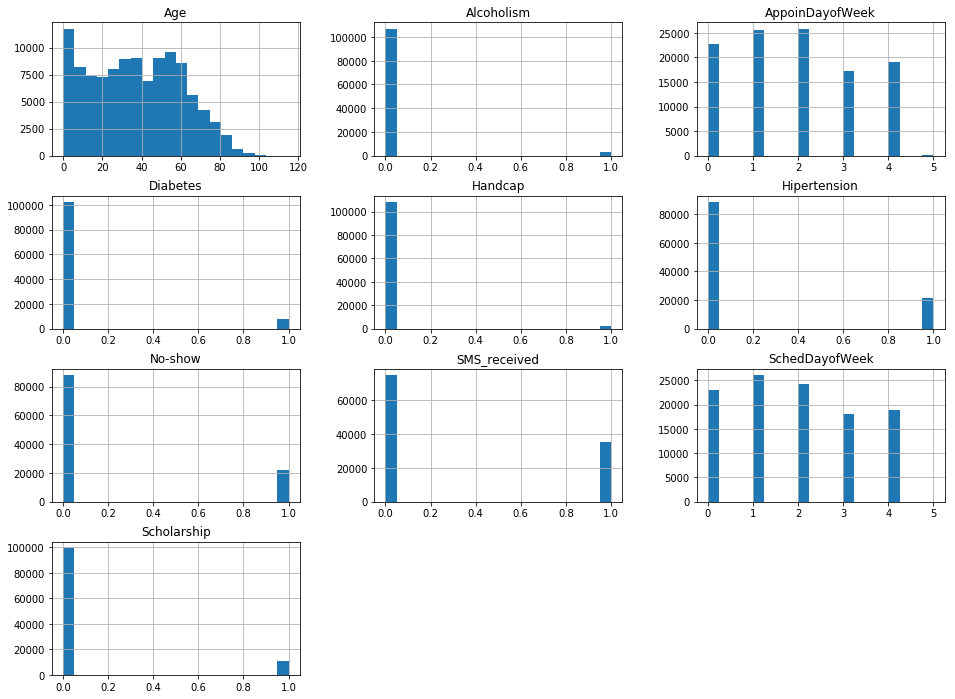

In [21]:
df_copy.hist(figsize= (16, 12), bins= 20);

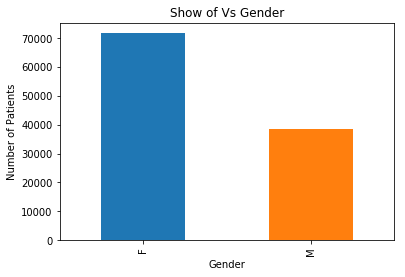

In [25]:
def plot_bar(a,b,c):
    """ this function is used to show any bar chart"""
    ax= df_copy[a].value_counts().plot(kind= 'bar')
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    ax.set_title(c)
plot_bar('Gender','Number of Patients','Show of Vs Gender')

**Findings and Observations:**

<li> Patients with the age from 0 to 70 are nearly equally distributed among the dataset, while who are older than 70 years old do not represent too much of the dataset.
<li> Females are the greater portion, women takes way more care of their health in comparison to men.
<lo> Patients with Alcoholism, Diabetes, and Hypertension are very small portion of the dataset, so the dataset may be not very representive to them. 

### 3- Splitting the dataset into two parts, patients who show up and patients who do not and then repeat the features exploration

**First: Splitting the Dataset**

In [26]:
df_show= df_copy[df_copy['No-show'] == False]
df_donot_show= df_copy[df_copy['No-show'] == True]

**Second: Exploring Patients Who Showed Up Vs Who Did not**



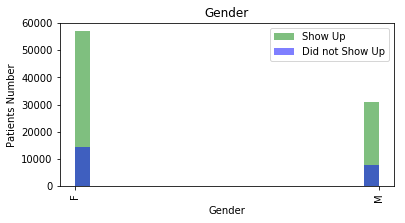

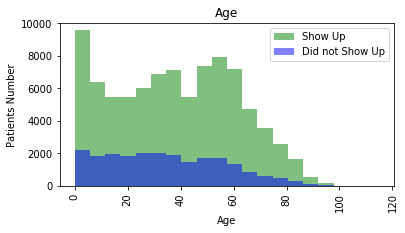

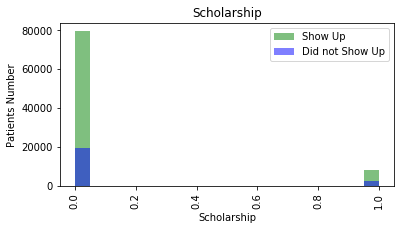

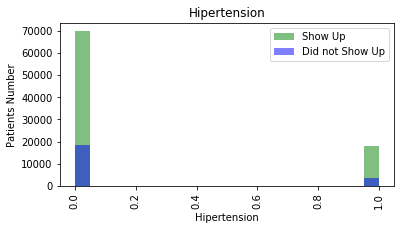

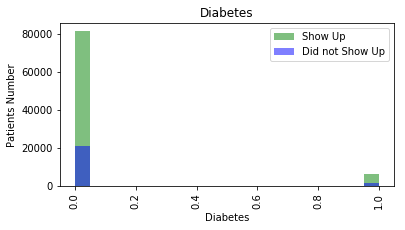

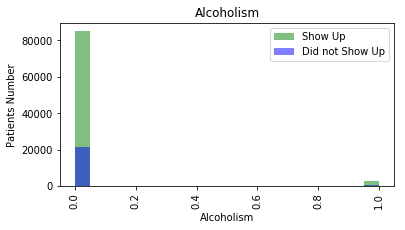

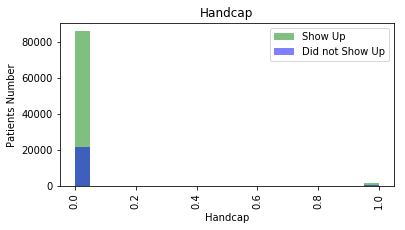

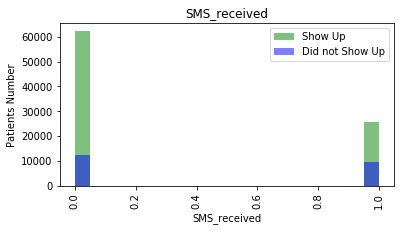

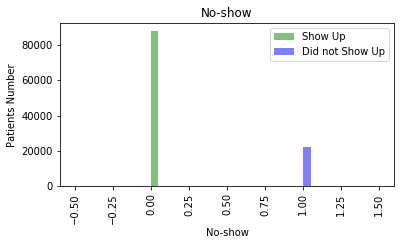

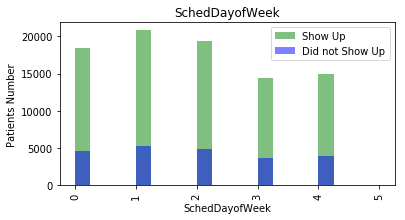

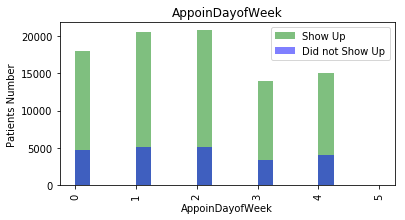

In [36]:
for i in df_copy.columns[:11]:
        plt.figure(figsize= (6,3))
        plt.hist(df_show[i], bins= 20, alpha= 0.5, color= 'green', label= 'Show Up')
        plt.hist(df_donot_show[i], bins= 20, alpha= 0.5, color= 'blue', label= 'Did not Show Up')
        plt.xlabel(i)
        plt.xticks(rotation= 90)
        plt.ylabel('Patients Number')
        plt.title(i)
        plt.legend()
        plt.show()

### 4- Asking Questions


### Is there a correlation between age and patients who did not show?

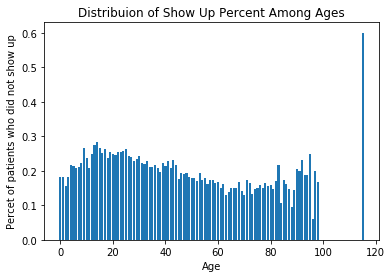

In [28]:
plt.bar(sorted(df_copy['Age'].unique()), df_copy.groupby(['Age'])['No-show'].mean())
plt.xlabel('Age')
plt.ylabel('Percet of patients who did not show up')
plt.title('Distribuion of Show Up Percent Among Ages')
plt.show()

**Babies and old patients (between 40 and 70 years old) are more likely to come in their medical appointment than middle age patients (18 to 25)**  








### Is there a correlation between number of days between the Scheduled Day and the Appointment Day with patients who did not show?

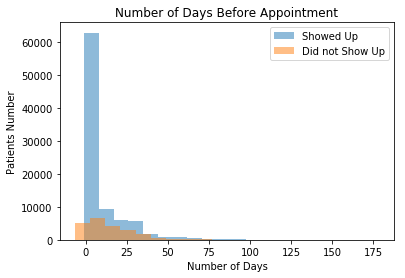

In [29]:
plt.hist(df_show['DaysBefore'].astype('timedelta64[m]')/(60*24),bins=20, alpha= 0.5, label= 'Showed Up')
# Note: in the previous step we extracted time as minutes so we devided by (60*24) to convert to days
plt.hist(df_donot_show['DaysBefore'].astype('timedelta64[m]')/(60*24),bins=20, alpha= 0.5, label= 'Did not Show Up')
plt.xlabel('Number of Days')
plt.ylabel('Patients Number')
plt.title('Number of Days Before Appointment')
plt.legend()
plt.show();

**There is a very strong correlation between hrs before appointment and whether or not the patient show up, where patient who book their medical appointment right before it are more likely to show up**

However, the data has many invalid dates where the Schedueled day is after the Appointment day represented in negative values, so we will remove these values and repeat the analysis.

In [30]:
# Remove wrong rows
df_show_updated= df_show[df_show['DaysBefore'].astype('timedelta64[m]')/(60*24) > 0]
df_donot_show_updated= df_donot_show[df_donot_show['DaysBefore'].astype('timedelta64[m]')/(60*24) > 0]

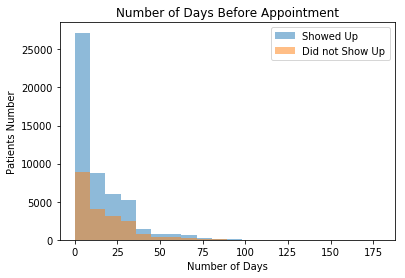

In [31]:
plt.hist(df_show_updated['DaysBefore'].astype('timedelta64[m]')/(60*24),bins=20, alpha= 0.5, label= 'Showed Up')
plt.hist(df_donot_show_updated['DaysBefore'].astype('timedelta64[m]')/(60*24),bins=20, alpha= 0.5, label= 'Did not Show Up')
plt.xlabel('Number of Days')
plt.ylabel('Patients Number')
plt.title('Number of Days Before Appointment')
plt.legend()
plt.show();

**Now the correlation is clear, patients who book their appointment within 5 days are more likely to show up.**

### Is there a correlation between sending SMS to the patient and the chance of showing up?

In [32]:
df_copy.groupby(['SMS_received'])['No-show'].mean()

SMS_received
False    0.166947
True     0.275857
Name: No-show, dtype: float64

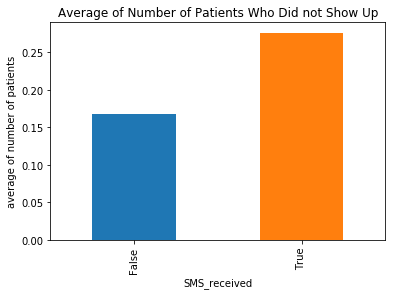

In [35]:
ax= df_copy.groupby(['SMS_received'])['No-show'].mean().plot(kind= 'bar')
ax.set_ylabel('average of number of patients')
ax.set_title("Average of Number of Patients Who Did not Show Up");

**Sending an SMS does not seem to be a good way of attracting patients to come in their appointments**

27.57% of patients who received an SMS before the appointment did not show up compared to 16.7% only of who, who did not receive an SMS.

### Is there inter-relations among Hibertension, Handcap, Alcoholism, and Scholarship that describes patients who are more likely to not show up?

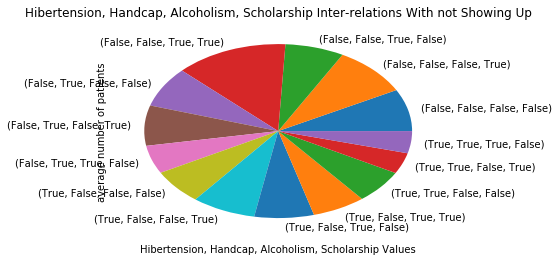

In [39]:
df_copy.groupby(['Hipertension', 'Handcap', 'Alcoholism', 'Scholarship'])['No-show'].mean().plot(kind='pie')
plt.title("Hibertension, Handcap, Alcoholism, Scholarship Inter-relations With not Showing Up")
plt.xlabel('Hibertension, Handcap, Alcoholism, Scholarship Values')
plt.ylabel('average number of patients');

**Patients who do not have Hypertension and Handcap while they have Alcoholism and are enrolled in the Brazillian Scholarship are more likely to not showing up with 35% chance**

<a id='conclusions'></a>
## Conclusions

<li> Babies and old patients (between 40 and 70 years old) are more likely to come in their medical appointment than middle age patients (18 to 25)
<li> patients who book their appointment within 5 days are more likely to show up.
<li> 27.57% of patients who received an SMS before the appointment did not show up compared to 16.7% only of who, who did not received an SMS.
<li> Patients who do not have Hypertension and Handcap while they have Alcoholism and are enrolled in the Brazillian Scholarship are more likely to not showing up with 35% chance.

## Limitations

<li> The SchedueledDay and AppointmentDay columns are inaccurate, large number of rows have wrong data represented in a negative time interval between Schedueled and Appointment days, i.e. the appointment is schedueled after it was done which is not logic.
<li> Few Number relative to the dataset size of wrong values are found in the Age and Handcap columns, so they were dropped.
<li> Patients with Alcoholism, Diabetes, and Hypertension are very small portion of the dataset, so the dataset may be not very representive to them.